In [8]:
# Imports of libraries and frameworks:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics

# Set random seeds
seed = 69
np.random.seed(seed)

Load dataset:

In [9]:
filename = '../../datasets/v000_SCIG_SC_SENSORC_FOURIER_010.csv'
dataset = pd.read_csv(filename);

In [10]:
dataset.head()

,idx,fx1_R,fx0d5_R,fx1d5_R,fx2d5_R,fx3_R,fx5_R,fx7_R,fx1_S,fx0d5_S,...,fx7_T,Freq_Rated,Freq_Gen,CC_bus,Power,I_R_rms,I_S_rms,I_T_rms,Load,Class
0,1,1.0,0.007299,0.006626,0.000968,0.023378,0.023553,0.006339,1.0,0.007219,...,0.006059,45.0,43.85,369,0.57,2.906343,2.920356,2.986445,0,1
1,2,1.0,0.003416,0.006184,0.001155,0.023907,0.013409,0.005977,1.0,0.003368,...,0.005722,45.0,43.87,368,0.55,2.885150,2.896358,2.962763,0,1
2,3,1.0,0.003490,0.004380,0.000786,0.018111,0.011143,0.005009,1.0,0.003484,...,0.004889,45.0,43.89,367,0.55,2.851384,2.863890,2.935414,0,1
3,4,1.0,0.002984,0.002304,0.000533,0.019345,0.014027,0.004023,1.0,0.002979,...,0.003913,45.0,43.91,365,0.53,2.819084,2.827510,2.900116,0,1
4,5,1.0,0.004993,0.004015,0.001150,0.025392,0.018566,0.004693,1.0,0.004956,...,0.004557,45.0,43.93,363,0.52,2.761420,2.774290,2.844834,0,1


Remove unwanted features

In [11]:
unwanteFeatures = ['idx', 'fx1_R', 'fx1_S', 'fx1_T', 'Freq_Rated', 'Power']
dataset_important_features = dataset.drop(unwanteFeatures, axis=1)

dataset_important_features.head()

,fx0d5_R,fx1d5_R,fx2d5_R,fx3_R,fx5_R,fx7_R,fx0d5_S,fx1d5_S,fx2d5_S,fx3_S,...,fx3_T,fx5_T,fx7_T,Freq_Gen,CC_bus,I_R_rms,I_S_rms,I_T_rms,Load,Class
0,0.007299,0.006626,0.000968,0.023378,0.023553,0.006339,0.007219,0.006553,0.000958,0.023122,...,0.022347,0.022515,0.006059,43.85,369,2.906343,2.920356,2.986445,0,1
1,0.003416,0.006184,0.001155,0.023907,0.013409,0.005977,0.003368,0.006097,0.001139,0.023569,...,0.022888,0.012837,0.005722,43.87,368,2.885150,2.896358,2.962763,0,1
2,0.003490,0.004380,0.000786,0.018111,0.011143,0.005009,0.003484,0.004373,0.000785,0.018082,...,0.017678,0.010877,0.004889,43.89,367,2.851384,2.863890,2.935414,0,1
3,0.002984,0.002304,0.000533,0.019345,0.014027,0.004023,0.002979,0.002300,0.000532,0.019312,...,0.018814,0.013642,0.003913,43.91,365,2.819084,2.827510,2.900116,0,1
4,0.004993,0.004015,0.001150,0.025392,0.018566,0.004693,0.004956,0.003986,0.001141,0.025204,...,0.024655,0.018027,0.004557,43.93,363,2.761420,2.774290,2.844834,0,1


In [12]:
# X are the inputs and y the outputs:

X = dataset_important_features.values[:,:-1]
y = dataset_important_features.values[:,-1]

### Preprocessing data with standardization

In [14]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler();
std_scaler.fit(X)

X_prepared = std_scaler.transform(X)

## Training with 10-fold Cross Validation

In [15]:
# Create an MLP:
from sklearn.neural_network import MLPClassifier

mlpCLf = MLPClassifier(solver='lbfgs', alpha=1e-5, learning_rate='adaptive', learning_rate_init = 0.1,
                    max_iter=1300, momentum=0.3, activation = 'tanh', power_t=0.5,
                    hidden_layer_sizes=(10,))

In [16]:
# Create a cross validation object:

from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(mlpCLf, X_prepared, y, cv=10)

In [17]:
def percentage_confusion_matrix (mat):
    return np.around(100*(mat / mat.sum(axis=1)[:,None]), 2)

In [18]:
print(percentage_confusion_matrix(metrics.confusion_matrix(y_pred, y)))
print(metrics.accuracy_score(y_pred, y))

[[100.     0.     0.     0.     0.     0.     0.  ]
 [  1.42  82.08   0.47   0.    16.04   0.     0.  ]
 [  0.     0.    95.53   2.79   1.12   0.56   0.  ]
 [  0.     0.     2.2   97.8    0.     0.     0.  ]
 [  0.    16.96   1.17   0.    81.87   0.     0.  ]
 [  0.     0.     0.48   0.     0.48  97.12   1.92]
 [  0.     0.     0.     0.     0.     3.14  96.86]]
0.9321533923303835


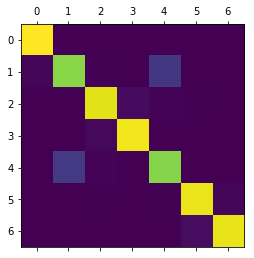

In [19]:
mat = metrics.confusion_matrix(y_pred, y)

plt.matshow((mat / mat.sum(axis=1)[:,None]))
plt.show()